<a href="https://colab.research.google.com/github/A1zhas/OCR/blob/main/%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%22%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_OCR_%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0_%D0%BF%D0%B5%D1%87%D0%B0%D1%82%D0%BD%D1%8B%D1%85_%D1%81%D0%B8%D0%BC%D0%B2%D0%BE%D0%BB%D0%BE%D0%B2_%D0%B8_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_(%D0%A2%D0%9E%D0%9E_QAZAQSTROY)%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import utils               # Утилит для to_categorical
from tensorflow.keras.preprocessing import image # Для загрузки изображений
import numpy as np                               # Работа с массивами
import matplotlib.pyplot as plt                  # Отрисовка графиков
import time, gdown, os, random                                        # Для работы с файлами
from PIL import Image, ImageEnhance              # Инструменты для работы с изображениями

import math                                      # Математические функции
from sklearn.model_selection import train_test_split
%matplotlib inline
import cv2
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from google.colab.patches import cv2_imshow

# Дополнительные инструменты визуализации
import seaborn as sns
sns.set_style('darkgrid')

# Загрузка и распаковка данных



In [ ]:
import gdown

gdown.download('https://drive.google.com/uc?id=1AeS2VCSxOnHGo9VgmhoSAPGmOnBXBOPx', None, quiet=True)

# https://drive.google.com/file/d/1AeS2VCSxOnHGo9VgmhoSAPGmOnBXBOPx/view?usp=drive_link

# https://drive.google.com/file/d/1212s4mA0vQ1ZLJDOVX8yRWvdeAzPH1sP/view?usp=drive_link

# url = 'https://drive.google.com/uc?id=1212s4mA0vQ1ZLJDOVX8yRWvdeAzPH1sP' # ссылка должна быть рабочей, "/uc?id=" проверить перед работой (!)
# output = '/content/uni_asc.zip'
# gdown.download(url, output)#, quiet=True) # вызываем скачивание без сообщений

# file_size = os.path.getsize(output)
# print('\n'+"Размер скачанного файла:", file_size, "байт") # теперь проверяем результат

'dataset.zip'

In [ ]:
from zipfile import ZipFile

# Распаковываем архив скриншотов
base_dir = '/content/dataset/'
with ZipFile('/content/dataset.zip', "r") as myzip:
    myzip.extractall(path=base_dir)

In [ ]:
# Удаление файл или каталога (-r рекурсивно)
!rm -r dataset.zip

# Создание переменных





Cписки файлов для всех классов:

In [ ]:
CLASS_LIST = sorted(os.listdir(base_dir)) # Определение списка имен классов
CLASS_COUNT = len(CLASS_LIST)             # Определение количества классов
# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 103, метки классов: ['0', '1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


# Пример как можем теперь можем обратиться к любому файлу

In [ ]:
i = 2

# Формирование пути к выборке одной марки авто
f'{base_dir}{CLASS_LIST[i]}/'

'/content/dataset/10/'

Список файлов всех классов

In [ ]:
for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{base_dir}{cls}/'))

0 : ['2023-12-12_11-33-4816.png', '2023-12-12_11-38-054.png', '2023-12-12_11-38-055.png', '2023-12-12_11-25-463.png', '2023-12-12_11-33-482.png', '2023-12-12_11-33-4821.png', '2023-12-12_11-33-488.png', '2023-12-12_11-25-462.png', '2023-12-12_11-25-4623.png', '2023-12-12_11-38-056.png', '2023-12-12_11-25-4610.png', '2023-12-12_11-25-4614.png', '2023-12-12_11-33-487.png', '2023-12-12_11-25-466.png', '2023-12-12_11-33-485.png', '2023-12-12_11-33-4814.png', '2023-12-12_11-25-4625.png', '2023-12-12_11-33-489.png', '2023-12-12_11-33-486.png', '2023-12-12_11-33-4810.png', '2023-12-12_11-25-4619.png', '2023-12-12_11-25-4611.png', '2023-12-12_11-25-468.png', '2023-12-12_11-33-481.png', '2023-12-12_11-25-4620.png', '2023-12-12_11-38-052.png', '2023-12-12_11-33-4822.png', '2023-12-12_11-25-4626.png', '2023-12-12_11-38-058.png', '2023-12-12_11-25-4616.png', '2023-12-12_11-25-4628.png', '2023-12-12_11-25-4612.png', '2023-12-12_11-25-464.png', '2023-12-12_11-25-465.png', '2023-12-12_11-25-469.png',

# Подготовка

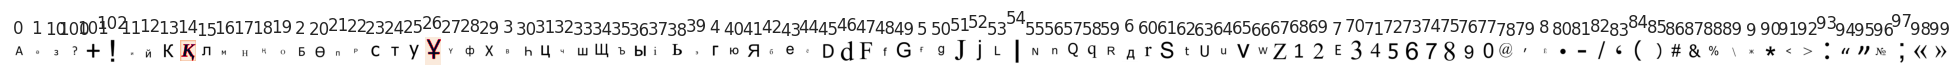

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    ltr_path = f'{base_dir}{CLASS_LIST[i]}/'
    # Выбор случайного фото из i-го класса
    img_path = ltr_path + random.choice(os.listdir(ltr_path))
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

# OpenCV обрезка

In [ ]:
# Выбираем случайный класс
random_class = CLASS_LIST[random.randint(0,CLASS_COUNT-1)]
# Путь к папке класс
random_class_path = os.path.join(base_dir, random_class)
# Выбираем случайную букву
random_ltr = random.choice(os.listdir(random_class_path))
# Выводим путь к букве
print(os.path.join(random_class_path, random_ltr))

/content/dataset/85/2024-01-17_15-03-2014.png


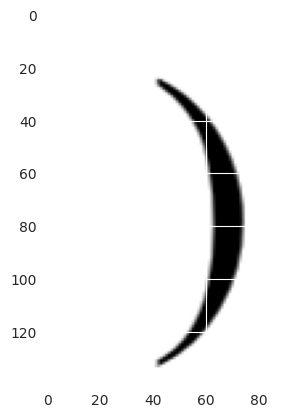

Изображение класса 85 c именем 2024-01-17_15-03-2014.png имеет размерность (140, 94, 3).


In [ ]:
# Загрузим изображение случайной буквы
image = cv2.imread(os.path.join(random_class_path, random_ltr))

# Выведем цветное изображение
plt.imshow(image)
plt.show()

# Напечатаем параметры изображения
print(f'Изображение класса {random_class} c именем {random_ltr} имеет размерность {image.shape}.')

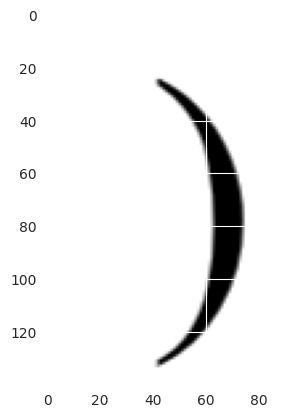

Изображение класса 85 c именем 2024-01-17_15-03-2014.png в оттенках серого имеет размерность (140, 94).


In [ ]:
# Преобразуем изображение в оттенки серого
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Выведем изображение в оттенках серого
plt.imshow(gray_img, cmap = 'gray')
plt.show()

# Напечатаем параметры изображения
print(f'Изображение класса {random_class} c именем {random_ltr} в оттенках серого имеет размерность {gray_img.shape}.')

https://dev-gang.ru/article/python-cv-dilate-rasshirenie-izobrazhenii-s-ispolzovaniem-opencv-sp8sujfqf9/

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

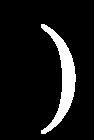

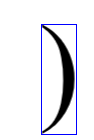

In [ ]:
# Применим заданный порог к изображению
th, threshed = cv2.threshold(gray_img, 40, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

# Зададим размер ядра фильтра
kernel_size = 3

# Применим морфологический фильтр расширения, для объедининия элементов составных символов
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dilated = cv2.dilate(threshed, kernel, iterations = 1)
cv2_imshow(dilated)

# Обнаружим контуры букв средствами openСV
cnts = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

# Извлечем индекс самого большого по размеру контура
areas = [cv2.contourArea(c) for c in cnts]
max_index = np.argmax(areas)
cnt=cnts[max_index]

# Вычислим параметры прямоугольника ограничивающего контур
x,y,w,h = bbox = cv2.boundingRect(cnt)
cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 1)

cv2_imshow(image)

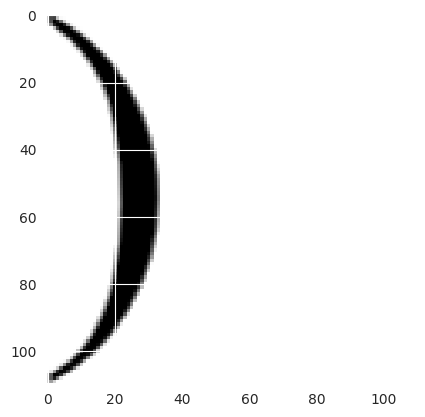

In [ ]:
# Обрезаем букву по найденному контуру и дополняем холст до квадрата
cutted_gray = gray_img[y:y+h, x:x+w]
width = cutted_gray.shape[0]
height =  cutted_gray.shape[1]
if width > height:
  addition = np.ones([width,width-height])*255
  result = np.hstack([cutted_gray,addition])
elif height > width:
  addition = np.ones([height-width,height])*255
  result = np.vstack([addition, cutted_gray])
plt.imshow(result, cmap='gray')

In [ ]:
# Проверяем размерность
result.shape

(110, 110)

https://robocraft.ru/computervision/3956

In [ ]:
# Зададим словарь методов интерполяции
interpolation_algorithm = {
    "nearest": cv2.INTER_NEAREST,
    "bilinear": cv2.INTER_LINEAR,
    "bicubic": cv2.INTER_CUBIC,
    "area": cv2.INTER_AREA,
    "lanczos4": cv2.INTER_LANCZOS4
}

In [ ]:
# Откорректируем размер изображения
result = cv2.resize(result, (28, 28), interpolation = interpolation_algorithm.get("area"))

In [ ]:
# Проверяем размерность
gray_img.shape

(140, 94)

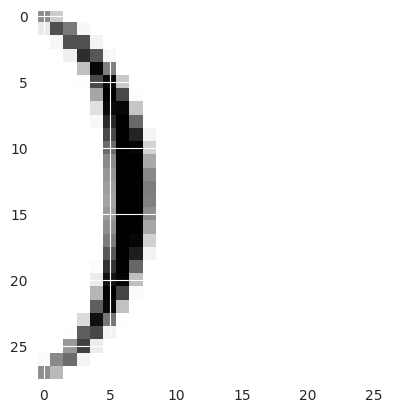

In [ ]:
# Выводим результат
plt.imshow(result, cmap='gray')

# Комплексная функция преобразования изображения буквы

Объединим код выше в одну функцию, которая будет получать на вход путь к изображению, а на выходе выдавать подготовленную выровненную и приведенную к нужному размеру букву.

In [ ]:
# Комплексная функция преобразования изображения
def make_right_symbol_with_contours(path,               # Путь к букве
                      size = (28,28),     # Целевой размер изображения
                      kernel = (3,3),     # Размер ядра фильтра dilate
                      i_method = 'area'): # Метод интерполяции

  # Словарь методов интерполяции
  interpolation_algorithm = {
    "nearest": cv2.INTER_NEAREST,
    "bilinear": cv2.INTER_LINEAR,
    "bicubic": cv2.INTER_CUBIC,
    "area": cv2.INTER_AREA,
    "lanczos4": cv2.INTER_LANCZOS4
    }

  # Загрузка изображения буквы
  image = cv2.imread(path)

  # Преобразование изображения в оттенки серого
  gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Применение заданного порога к изображению
  th, threshed = cv2.threshold(gray_img, 40, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

  # Применение фильтра расширения, для объедининия элементов составных символов
  kernel = np.ones(kernel_size, np.uint8)
  dilated = cv2.dilate(threshed, kernel, iterations = 1)

  # Обнаружение контура букв средствами openСV
  cnts = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

  # Извлечение индекса самого большого по размеру контура
  areas = [cv2.contourArea(c) for c in cnts]
  max_index = np.argmax(areas)
  cnt=cnts[max_index]

  # Вычисление параметров прямоугольника ограничивающего контур
  x,y,w,h = bbox = cv2.boundingRect(cnt)

  # Добавим пиксель для запаса к контуру
  if y != 0:
    y -= 1
    h += 1
  if x != 0:
    x -= 1
    w += 1

  # Обрезка буквы по контуру и дополнение холста до квадрата
  cutted_gray = gray_img[y:y+h, x:x+w]
  width = cutted_gray.shape[0]
  height =  cutted_gray.shape[1]

  if width > height:
    addition = np.ones([width,width-height])*255
    result = np.hstack([cutted_gray,addition])
  elif height > width:
    addition = np.ones([height-width,height])*255
    result = np.vstack([addition, cutted_gray])
  else:
    result = cutted_gray

  # Корректировка размера изображения
  result = cv2.resize(result, size, interpolation = interpolation_algorithm.get("area"))

  return result

# Проверка функции

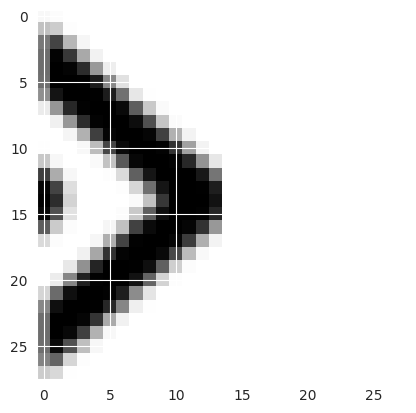

Изображение класса 99 c именем 2024-01-18_12-31-5611.png в оттенках серого имеет размерность (28, 28).


In [ ]:
# Выбираем случайный класс
random_class = CLASS_LIST[random.randint(0,CLASS_COUNT-1)]
# Путь к папке класс
random_class_path = os.path.join(base_dir, random_class)
# Выбираем случайную букву
random_ltr = random.choice(os.listdir(random_class_path))
# Подаем путь в функцию
result = make_right_symbol_with_contours(os.path.join(random_class_path, random_ltr))
# Выводим результат
plt.imshow(result, cmap='gray')
plt.show()
# Напечатаем параметры изображения
print(f'Изображение класса {random_class} c именем {random_ltr} в оттенках серого имеет размерность {result.shape}.')

Можно повторить вывод тестовый вывод датасета, но уже с учетом обработки.

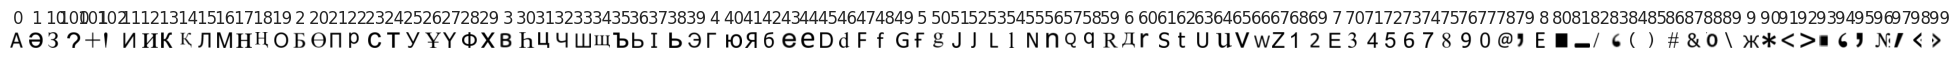

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    ltr_path = f'{base_dir}{CLASS_LIST[i]}/'
    # Выбор случайного фото из i-го класса
    img_path = ltr_path + random.choice(os.listdir(ltr_path))
    try:
      # Обработка изоборажения
      result = make_right_symbol_with_contours(img_path)
      # Отображение фотографии (подробнее будет объяснено далее)
      axs[i].set_title(CLASS_LIST[i])
      axs[i].imshow(make_right_symbol_with_contours(img_path), cmap = 'gray')
      axs[i].axis('off')
    except:
      print('Не удалось обработать изображение по следующему пути:',img_path)

# Отрисовка всего полотна
plt.show()

Заметно, что все изображения стали одного размера и символы максимально растянуты до ширины области начиная из нижнего левого угла.

Однако можно заметить, что ядро по-умолчанию не смогло захватить точки у вопросительного и восклицательного знака и диакритический знак бреве над Й.

Стоит попробовать другой подход, просто обрезая массив сверзу и снизу.


# Обработка
Теперь можно включить сохданную выше функцию в обработку изображений для обучения.


In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = base_dir + class_name    # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} букв')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]
    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для обучения:', len(data_labels))


Размер класса 0 составляет 58 букв
Размер класса 1 составляет 64 букв
Размер класса 10 составляет 64 букв
Размер класса 100 составляет 64 букв
Размер класса 101 составляет 64 букв
Размер класса 102 составляет 64 букв
Размер класса 11 составляет 64 букв
Размер класса 12 составляет 64 букв
Размер класса 13 составляет 64 букв
Размер класса 14 составляет 68 букв
Размер класса 15 составляет 64 букв
Размер класса 16 составляет 64 букв
Размер класса 17 составляет 64 букв
Размер класса 18 составляет 67 букв
Размер класса 19 составляет 64 букв
Размер класса 2 составляет 62 букв
Размер класса 20 составляет 68 букв
Размер класса 21 составляет 64 букв
Размер класса 22 составляет 64 букв
Размер класса 23 составляет 64 букв
Размер класса 24 составляет 64 букв
Размер класса 25 составляет 64 букв
Размер класса 26 составляет 62 букв
Размер класса 27 составляет 64 букв
Размер класса 28 составляет 64 букв
Размер класса 29 составляет 64 букв
Размер класса 3 составляет 65 букв
Размер класса 30 составляет 6

In [ ]:
print(data_files)
print(len(data_files))
print(len(data_labels))

['/content/dataset/0/2023-12-12_11-33-4816.png', '/content/dataset/0/2023-12-12_11-38-054.png', '/content/dataset/0/2023-12-12_11-38-055.png', '/content/dataset/0/2023-12-12_11-25-463.png', '/content/dataset/0/2023-12-12_11-33-482.png', '/content/dataset/0/2023-12-12_11-33-4821.png', '/content/dataset/0/2023-12-12_11-33-488.png', '/content/dataset/0/2023-12-12_11-25-462.png', '/content/dataset/0/2023-12-12_11-25-4623.png', '/content/dataset/0/2023-12-12_11-38-056.png', '/content/dataset/0/2023-12-12_11-25-4610.png', '/content/dataset/0/2023-12-12_11-25-4614.png', '/content/dataset/0/2023-12-12_11-33-487.png', '/content/dataset/0/2023-12-12_11-25-466.png', '/content/dataset/0/2023-12-12_11-33-485.png', '/content/dataset/0/2023-12-12_11-33-4814.png', '/content/dataset/0/2023-12-12_11-25-4625.png', '/content/dataset/0/2023-12-12_11-33-489.png', '/content/dataset/0/2023-12-12_11-33-486.png', '/content/dataset/0/2023-12-12_11-33-4810.png', '/content/dataset/0/2023-12-12_11-25-4619.png', '/c

In [ ]:
img_width = 28                         # Ширина изображения
img_height = 28

Проверка на размерность картинок

In [ ]:
data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    #Открытие и смена размера изображения
    img = make_right_symbol_with_contours(file_name)
    data_images.append(img)            # Добавление изображения в виде numpy-массива к общему списку

# Разделение Датасета на x_train, x_val и x_test

In [ ]:
x_train_org = np.array(data_images)         # Перевод общего списка изображений в numpy-массив и нормализация
y_train_org = np.array(data_labels)         # Перевод общего списка меток класса в numpy-массив

x_train, x_test, y_train, y_test = train_test_split(x_train_org, y_train_org, shuffle=True, test_size=0.1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5949, 28, 28)
(5949,)
(662, 28, 28)
(662,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,          # датасет с изображениям
                                                    y_train,          # датасет с метками
                                                    test_size = 0.1,  # процент тестовых значений
                                                    shuffle=True,     # перемешивание
                                                    random_state=42)

print('Обучающая выборка изображений', len(x_train))
print('Обучающая выборка меток', len(y_train))
print()
print('Тестовая выборка изображений', len(x_test))
print('Тестовая выборка меток', len(y_test))
print()
print('Валидационная выборка изображений', len(x_val))
print('Валидационная выборка меток', len(y_val))

Обучающая выборка изображений 5354
Обучающая выборка меток 5354

Тестовая выборка изображений 662
Тестовая выборка меток 662

Валидационная выборка изображений 595
Валидационная выборка меток 595


# Вывод примеров

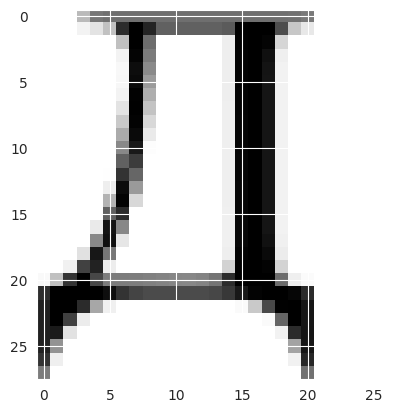

59


In [ ]:
# Вывод примера изображения из базы
n_example = 11
plt.imshow(np.reshape(x_train[n_example], (28,28)), cmap = 'gray')
plt.show()
print(y_train[n_example])

Вывод примеров изображений различных классов

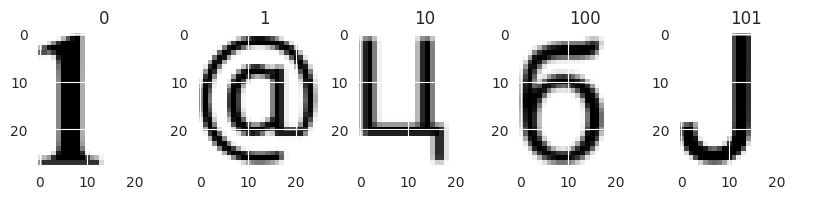

In [ ]:
x_shuffle = x_train.copy()
np.random.shuffle(x_shuffle)
# Создание полотна из пяти графиков
fig, axs = plt.subplots(1, 5, figsize=(10, 5))
# Проход и отрисовка по всем классам
for i in range(5):
    img = np.reshape(x_shuffle[i], (28,28))
    axs[i].imshow(img, cmap = 'gray')
    axs[i].set_title(CLASS_LIST[i])

# Вывод изображений
plt.show()

Вывод примера

In [ ]:
# Вывод размерностей
print('Размер массива x_train:',x_train.shape)
print('Размер массива y_train:',y_train.shape)
print('Размер массива x_test:',x_test.shape)
print('Размер массива y_test:',y_test.shape)
print('Размер массива x_val:',x_val.shape)
print('Размер массива y_val:',y_val.shape)

Размер массива x_train: (5354, 28, 28)
Размер массива y_train: (5354,)
Размер массива x_test: (662, 28, 28)
Размер массива y_test: (662,)
Размер массива x_val: (595, 28, 28)
Размер массива y_val: (595,)


# Подготовка данных

In [ ]:
# Изменение формы входных картинок с 28х28 на 28x28x1
print('Размерность ДО   ', x_train.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
print('Размерность ПОСЛЕ', x_train.shape)

# Нормализация, из диапазона 1-255 в 0-1
x_train= x_train.astype("float32")/255.
x_test= x_test.astype("float32")/255.
x_val= x_val.astype("float32")/255.

# Преобразование данных в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 103)
y_test = utils.to_categorical(y_test, 103)
y_val = utils.to_categorical(y_val, 103)

Размерность ДО    (5354, 28, 28)
Размерность ПОСЛЕ (5354, 28, 28, 1)


In [ ]:
# Вывод размерностей
print('Размер массива x_train:',x_train.shape)
print('Размер массива y_train:',y_train.shape)
print('Размер массива x_test:',x_test.shape)
print('Размер массива y_test:',y_test.shape)
print('Размер массива x_val:',x_val.shape)
print('Размер массива y_val:',y_val.shape)

Размер массива x_train: (5354, 28, 28, 1)
Размер массива y_train: (5354, 103)
Размер массива x_test: (662, 28, 28, 1)
Размер массива y_test: (662, 103)
Размер массива x_val: (595, 28, 28, 1)
Размер массива y_val: (595, 103)


https://habr.com/ru/articles/485890/

In [ ]:
# Создание структуры модели
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(CLASS_COUNT, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

In [ ]:
#Optimizer
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999 )

#Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#Define LearningRateScheduler
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
#defining these prior to model to increase readability and debugging
batch_size = 64
epochs = 50

# Fit the Model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    verbose=1,
                    callbacks = [reduce_lr]) #left out early_stopping parameter as it gets better accuracy

Epoch 1/50
84/84 [==============================] - 30s 316ms/step - loss: 1.8817 - accuracy: 0.5542 - val_loss: 5.6015 - val_accuracy: 0.0101 - lr: 0.0010
Epoch 2/50
84/84 [==============================] - 24s 291ms/step - loss: 0.4595 - accuracy: 0.8554 - val_loss: 6.7368 - val_accuracy: 0.0118 - lr: 9.0000e-04
Epoch 3/50
84/84 [==============================] - 24s 289ms/step - loss: 0.3379 - accuracy: 0.8877 - val_loss: 4.9352 - val_accuracy: 0.0555 - lr: 8.1000e-04
Epoch 4/50
84/84 [==============================] - 24s 286ms/step - loss: 0.2825 - accuracy: 0.9029 - val_loss: 3.2372 - val_accuracy: 0.1647 - lr: 7.2900e-04
Epoch 5/50
84/84 [==============================] - 25s 294ms/step - loss: 0.2268 - accuracy: 0.9117 - val_loss: 1.3753 - val_accuracy: 0.5765 - lr: 6.5610e-04
Epoch 6/50
84/84 [==============================] - 25s 293ms/step - loss: 0.2112 - accuracy: 0.9206 - val_loss: 0.3687 - val_accuracy: 0.8639 - lr: 5.9049e-04
Epoch 7/50
84/84 [==========================

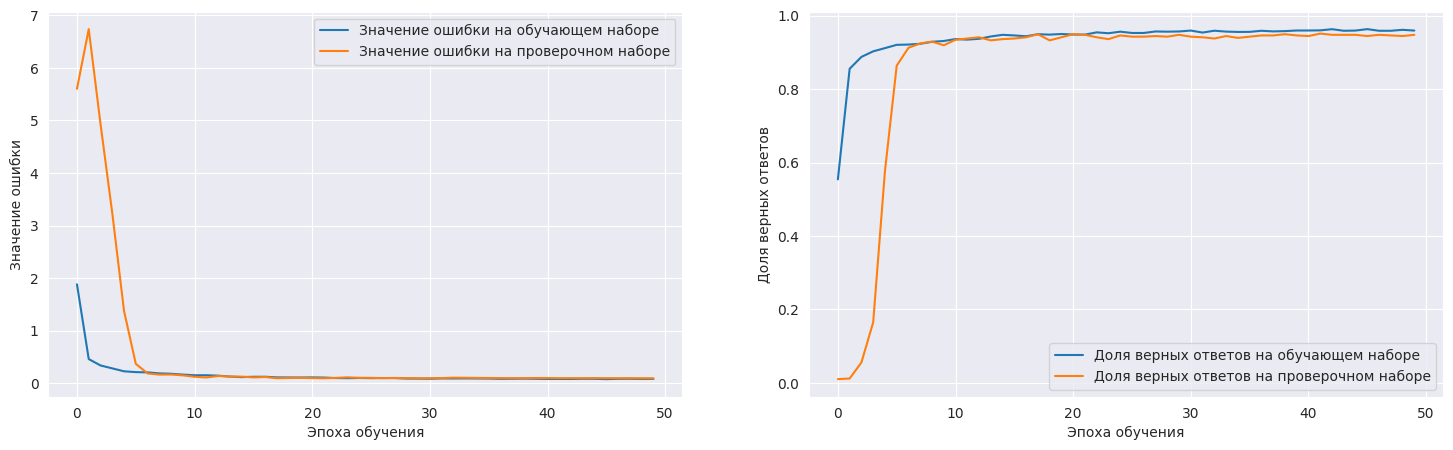

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
# Предсказание тестовой выборки
prediction = model.predict(x_test)

# Предсказание на материале случайного изображения из базы
n = np.random.randint(0, 100)
print('Предсказание ', np.argmax(prediction[n]))
print('Правильный ответ', np.argmax(y_test[n]))

21/21 [==============================] - 1s 34ms/step
Предсказание  1
Правильный ответ 1


In [ ]:
n = 1
print('Предсказание ', np.argmax(prediction[n]))
print('Правильный ответ', np.argmax(y_test[n]))

Предсказание  72
Правильный ответ 72


In [ ]:
# Оценка результата
counter = 0
list_of_mistakes = []
for n in range(len(prediction)):
  pred = np.argmax(prediction[n])
  answer = np.argmax(y_test[n])
  if pred != answer:
    list_of_mistakes.append([pred, answer])
    counter += 1
print('Доля верных ответов на тестовой выборке:', 100 - counter/len(prediction)*100,'%')

Доля верных ответов на тестовой выборке: 94.41087613293051 %


In [ ]:
# Ункция для извлечения уникальныз элементов списка
def get_unique_from_list(list_of_mistakes):
    unique = []

    for mistake in list_of_mistakes:
        if mistake in unique:
            continue
        else:
            unique.append(mistake)
    return unique

In [ ]:
len(list_of_mistakes)

37

In [ ]:
unique_mistakes = get_unique_from_list(list_of_mistakes)

In [ ]:
print(unique_mistakes)

[[6, 7], [70, 81], [97, 85], [35, 33], [96, 82], [41, 42], [33, 35], [85, 97], [98, 80], [42, 41], [100, 80], [80, 100], [7, 6], [54, 99], [15, 40], [34, 53]]


Найдено 16 уникальных ошибок!


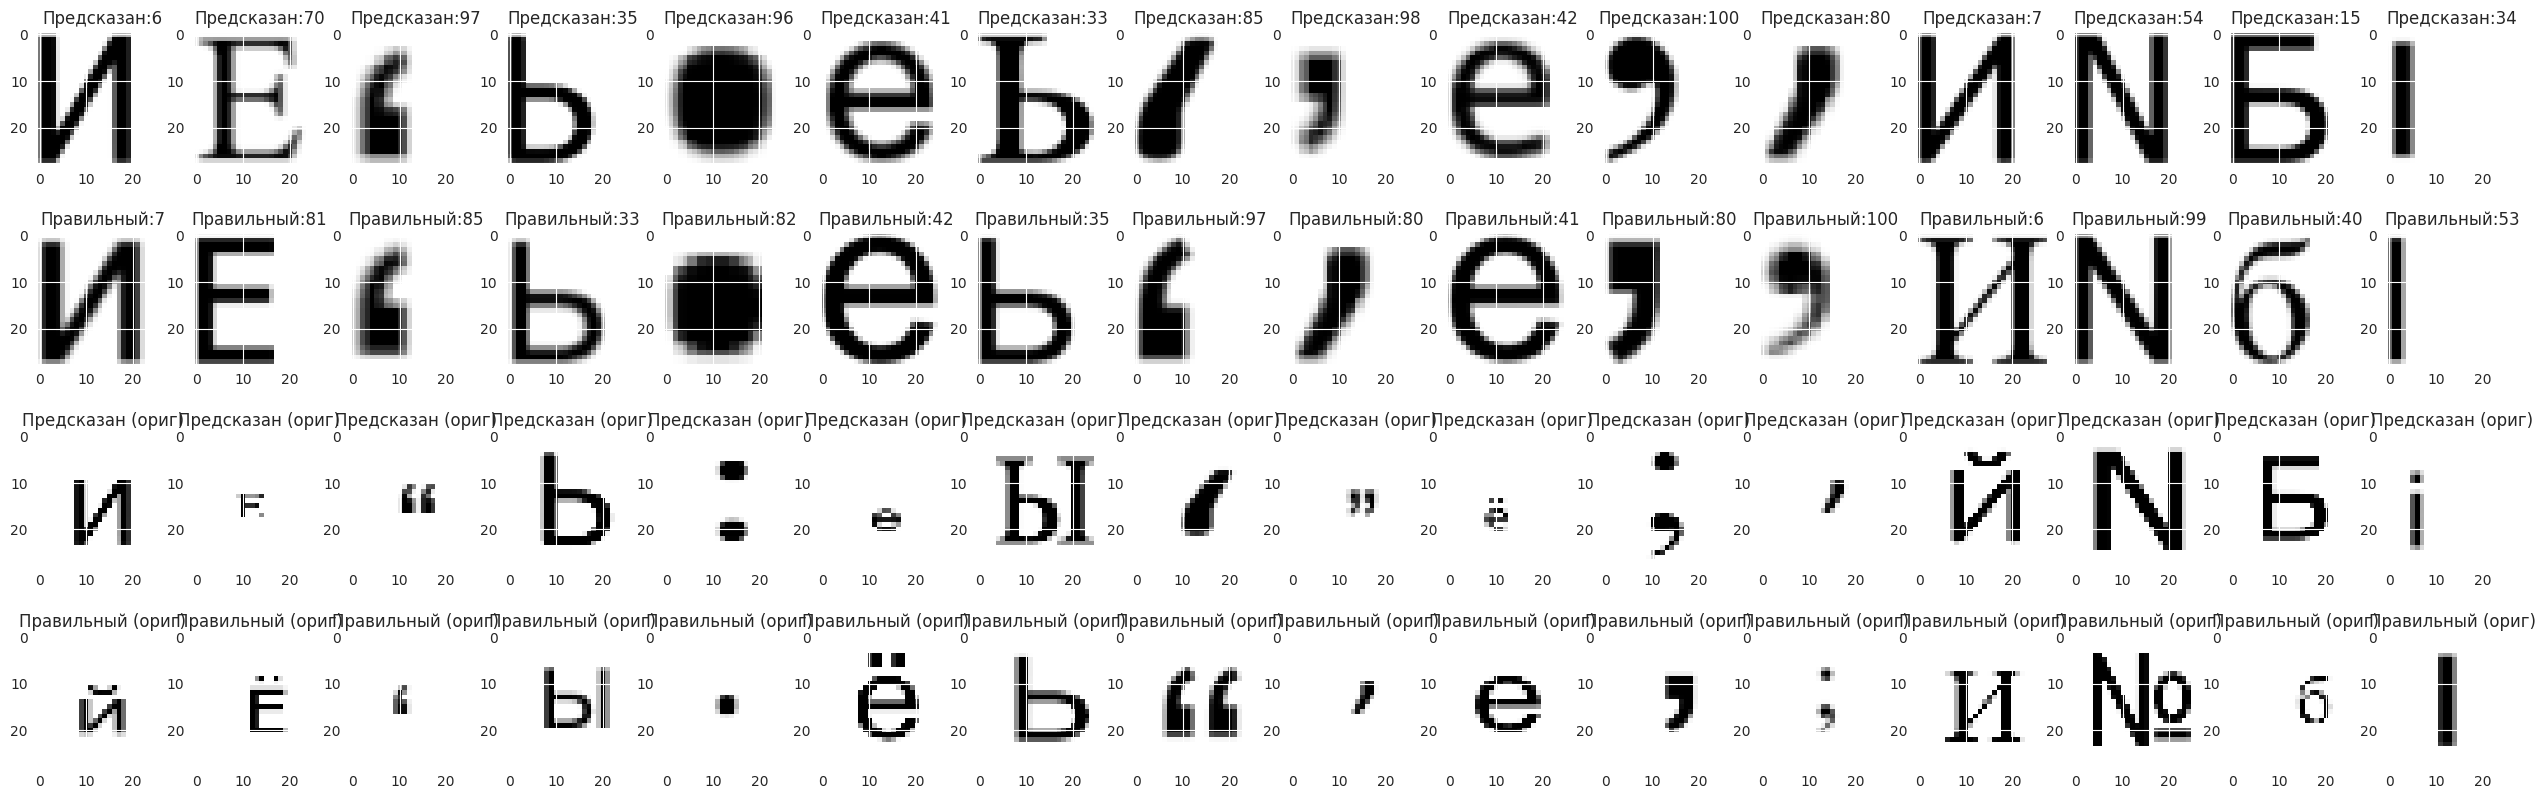

In [ ]:
# Вывод ошибок
unique_mistakes = get_unique_from_list(list_of_mistakes)
n = len(unique_mistakes)
print(f'Найдено {n} уникальных ошибок!')
#Ограничение вывода
#if n > 5: n = 5
#np.random.shuffle(unique_mistakes)
# Создание полотна из пяти графиков
fig, axs = plt.subplots(4, n, figsize=(2*n, 10))
# Проход и отрисовка по всем классам
for i in range(n):
    # Выбираем случайный класс
    pred_class = unique_mistakes[i][0]
    answer_class = unique_mistakes[i][1]
    # Путь к папке класс
    pred_class_path = os.path.join(base_dir, CLASS_LIST[pred_class])
    answer_class_path = os.path.join(base_dir, CLASS_LIST[answer_class])
    # Выбираем случайную букву
    random_ltr_p = random.choice(os.listdir(pred_class_path))
    random_ltr_a = random.choice(os.listdir(answer_class_path))
    # Подаем путь в функцию
    img_p = make_right_symbol_with_contours(os.path.join(pred_class_path, random_ltr_p))
    img_a = make_right_symbol_with_contours(os.path.join(answer_class_path, random_ltr_a))
    img_po = cv2.resize(cv2.imread(os.path.join(pred_class_path, random_ltr_p)), (28,28))
    img_ao = cv2.resize(cv2.imread(os.path.join(answer_class_path, random_ltr_a)), (28,28))
    axs[0][i].imshow(img_p, cmap = 'gray')
    axs[0][i].set_title('Предсказан:'+ str(unique_mistakes[i][0]))
    axs[1][i].imshow(img_a, cmap = 'gray')
    axs[1][i].set_title('Правильный:'+ str(unique_mistakes[i][1]))
    axs[2][i].imshow(img_po)
    axs[2][i].set_title('Предсказан (ориг)')
    axs[3][i].imshow(img_ao)
    axs[3][i].set_title('Правильный (ориг)')

# Вывод изображений
plt.show()